In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [3]:
df = pd.read_csv("train.csv")  # Kaggle House Prices dataset
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Fill numeric NaNs with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical NaNs with mode
for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [6]:
df = pd.get_dummies(df, drop_first=True)  # One-Hot Encoding
print(df.shape)


(1460, 246)


In [7]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
RMSE: 51396.87552006489
R2 Score: 0.6556028072509068


In [12]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest:
RMSE: 28738.265527296317
R2 Score: 0.8923268863397846


In [13]:
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\nGradient Boosting:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R2 Score:", r2_score(y_test, y_pred_gb))



Gradient Boosting:
RMSE: 27673.459134262706
R2 Score: 0.9001580480712631


In [14]:
xgbr = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

print("\nXGBoost:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))



XGBoost:
RMSE: 26532.151665479374
R2 Score: 0.908223569393158


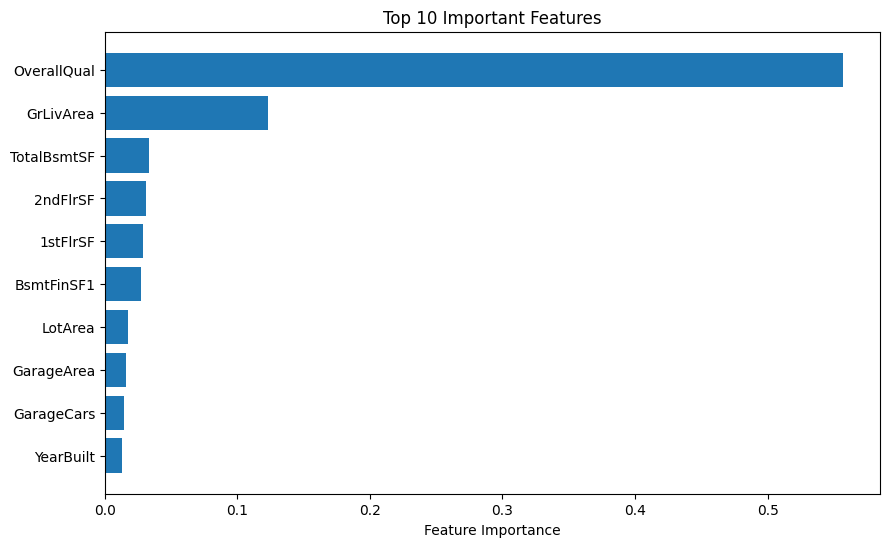

In [15]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()
